<a href="https://colab.research.google.com/github/RAJAS-KAR/GUVI-_Final-projects/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#/content/train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/train.csv")
df.head(5)   

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [5]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [6]:
df.shape

(45211, 11)

In [7]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# checking outliers 

age

Text(0.5, 1.0, 'visualizing')

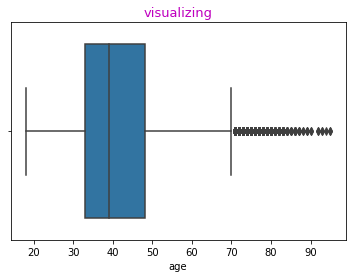

In [10]:
sns.boxplot('age', data=df)
plt.title('visualizing', color = 'm', size=13)

dur

Text(0.5, 1.0, 'visualizing')

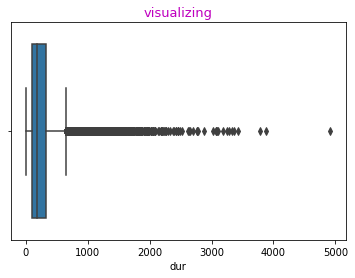

In [11]:
sns.boxplot('dur', data=df)
plt.title('visualizing', color = 'm', size=13)

In [12]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
lower_threshold = df['dur'].quantile(0.25) - (1.5*iqr)
upper_threshold = df['dur'].quantile(0.75) + (1.5*iqr)
print('lower_threshold:',lower_threshold, 'upper_threshold:',upper_threshold)
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

lower_threshold: -221.0 upper_threshold: 643.0


AFTER TREATING OUTLIERS

Text(0.5, 1.0, 'visualizing')

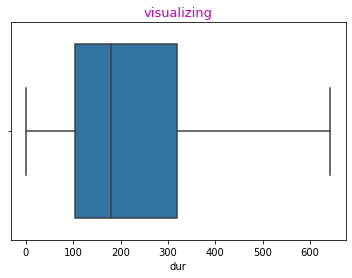

In [14]:
sns.boxplot('dur', data=df)
plt.title('visualizing', color = 'm', size=13)

num_calls

Text(0.5, 1.0, 'visualizing')

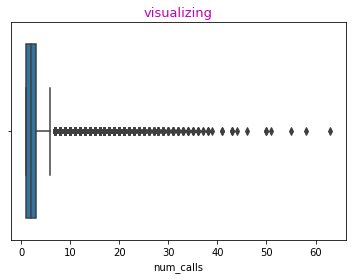

In [15]:
sns.boxplot('num_calls', data=df)
plt.title('visualizing', color = 'm', size=13)

In [16]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5*iqr)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5*iqr)
print('lower_threshold:',lower_threshold, 'upper_threshold:',upper_threshold)
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

lower_threshold: -2.0 upper_threshold: 6.0


AFTER TREATING OUTLIERS

Text(0.5, 1.0, 'visualizing')

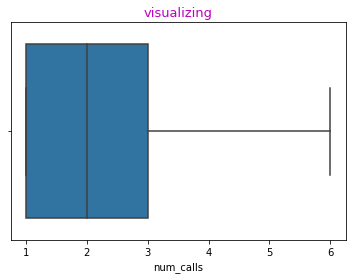

In [17]:
sns.boxplot('num_calls', data=df)
plt.title('visualizing', color = 'm', size=13)

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Target Variable

In [19]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [20]:
target_counts = df["y"].value_counts()
print('no:', target_counts[0])
print('yes:', target_counts[1])

no: 39922
yes: 5289


<AxesSubplot:title={'center':'targetcounts'}>

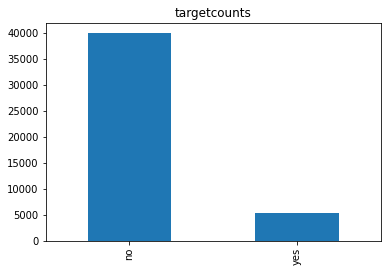

In [21]:
target_counts.plot(kind = 'bar', title = 'targetcounts')

we can see that data is *imbalanced*

# Feature

job

In [22]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [23]:
df['job'] = df['job'].replace('unknown', np.nan)

In [24]:
df['job'] = df['job'].fillna('blue-collar')

In [25]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [26]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

marital

In [27]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education_qual

In [28]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [29]:
df['education_qual'] = df['education_qual'].replace('unknown', np.nan)

In [30]:
df['education_qual'] = df['education_qual'].fillna('secondary')

In [31]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [32]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [33]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

# EDA - Exploratory Data Analysis

# Target

In [34]:
df.rename(columns = {'y':'target_counts'}, inplace = True)

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target_counts'],
      dtype='object')

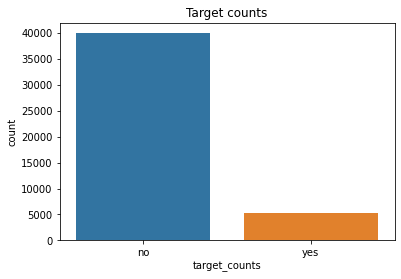

In [36]:
sns.countplot(df['target_counts'])
plt.title('Target counts')
plt.show()

# Target Encoding

In [37]:
df['target_counts'] = df['target_counts'].map({'no': 0, 'yes': 1})

# FEATURE

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  int64  
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  int64  
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  target_counts   45211 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.8+ MB


<AxesSubplot:ylabel='job'>

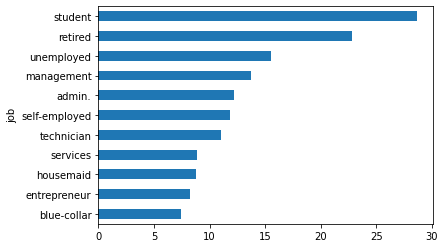

In [39]:
(df.groupby('job')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='marital'>

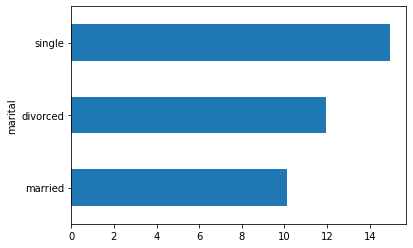

In [40]:
(df.groupby('marital')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='education_qual'>

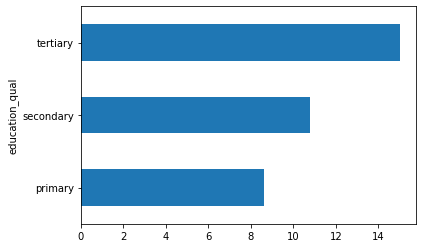

In [41]:
(df.groupby('education_qual')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='call_type'>

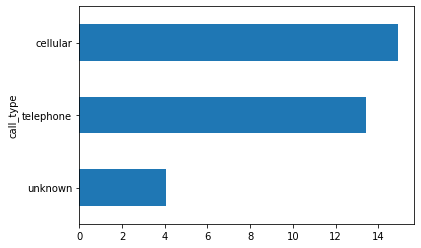

In [42]:
(df.groupby('call_type')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='mon'>

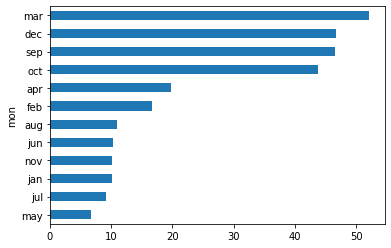

In [43]:
(df.groupby('mon')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='prev_outcome'>

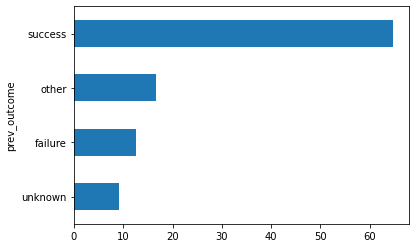

In [44]:
(df.groupby('prev_outcome')['target_counts'].mean()*100).sort_values().plot(kind = 'barh')

Distribution between the Feature - 1 ('age') vs target variable - ('y') 

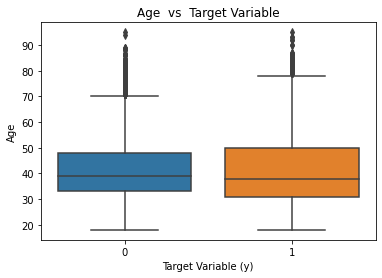

In [45]:
sns.boxplot(data=df, x='target_counts', y='age') 
plt.xlabel('Target Variable (y)') 
plt.ylabel('Age') 
plt.title('Age  vs  Target Variable')
plt.show()

Distribution between the Feature - 1 ('day') vs target variable - ('y')

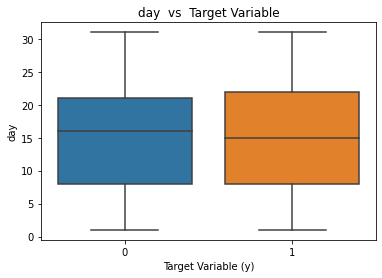

In [46]:
sns.boxplot(data=df, x='target_counts', y='day') 
plt.xlabel('Target Variable (y)') 
plt.ylabel('day') 
plt.title('day  vs  Target Variable')
plt.show()

Distribution between the Feature - 1 ('dur') vs target variable - ('y')

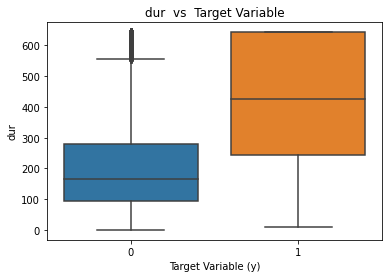

In [47]:
sns.boxplot(data=df, x='target_counts', y='dur') 
plt.xlabel('Target Variable (y)') 
plt.ylabel('dur') 
plt.title('dur  vs  Target Variable')
plt.show()

Distribution between the Feature - 1 ('num_calls') vs target variable - ('y')

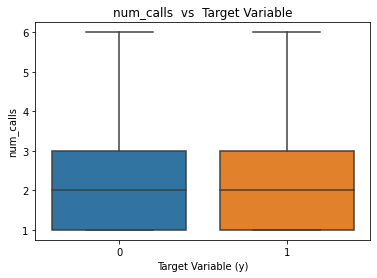

In [48]:
sns.boxplot(data=df, x='target_counts', y='num_calls') 
plt.xlabel('Target Variable (y)') 
plt.ylabel('num_calls') 
plt.title('num_calls  vs  Target Variable')
plt.show()

# FEATURE-ENCODING

JOB

In [49]:
df['job'] = df['job'].map({'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'self-employed':6,
                           'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})


marital

In [50]:
df['marital'] = df['marital'].map({'married': 1, 'divorced' : 2, 'single' : 3})

education_qual

In [51]:
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary' : 2, 'tertiary' : 3})

call_type

In [52]:
df['call_type'] = df['call_type'].map({'unknown' : 1, 'telephone' : 2, 'cellular': 3})

mon

In [53]:
df['mon'] = df['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':7,
                           'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12})

prev_outcome

In [54]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [55]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target_counts
0,58,8,1,3,1,5,1,261.0,1.0,1,0
1,44,5,3,2,1,5,1,151.0,1.0,1,0
2,33,2,1,2,1,5,1,76.0,1.0,1,0
3,47,1,1,2,1,5,1,92.0,1.0,1,0
4,33,1,3,2,1,5,1,198.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,643.0,3.0,1,1
45207,71,10,2,1,3,17,4,456.0,2.0,1,1
45208,72,10,1,2,3,17,4,643.0,5.0,4,1
45209,57,1,1,2,2,17,4,508.0,4.0,1,0


In [56]:
df['dur'] = df['dur'].astype('int')

In [57]:
df['num_calls'] = df['num_calls'].astype('int')

In [58]:
df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
target_counts     int64
dtype: object

# Data preparation and splitting

In [59]:
x = df.drop(['target_counts'], axis =1)
y = df['target_counts']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Scaling the Data

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Over_sampling followed by Under_sampling

In [62]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN(sampling_strategy= 'all')
x_train, y_train = smote.fit_resample(x_train, y_train)

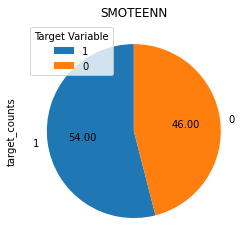

In [64]:
y_train.value_counts().plot.pie(autopct='%.2f',startangle = 90)
plt.title("SMOTEENN")
plt.legend(title = "Target Variable")
plt.show()

# Model

# 1.Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
L_reg = LogisticRegression()
L_reg.fit(x_train, y_train)

LogisticRegression()

In [103]:
y_pred = L_reg.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, roc_auc_score 
acc_log = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc_log))

Test set auc: 0.82


In [105]:
df1 = pd.DataFrame({'Actual':y_test, 'predicted': y_pred})
df1.head()

,Actual,predicted
12128,0,0
19630,0,0
33112,0,1
6378,0,0
21815,0,0


#2.KNN Algorithm

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 35, 50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train, y_train)
  print('K value :', i, 'Train_score :', knn.score(x_train, y_train), 'cv_score:', np.mean(cross_val_score(knn, x_test, y_test, cv =10)))

K value : 1 Train_score : 1.0 cv_score: 0.8655313401456999
K value : 2 Train_score : 0.9998582967266544 cv_score: 0.8847732606463599
K value : 3 Train_score : 0.997803599263143 cv_score: 0.8813445460323669
K value : 4 Train_score : 0.9977327476264701 cv_score: 0.88477326064636
K value : 5 Train_score : 0.9940130367011478 cv_score: 0.8862109470493327
K value : 6 Train_score : 0.9943318690661754 cv_score: 0.8864326749132155
K value : 7 Train_score : 0.9894076803174153 cv_score: 0.887428372365912
K value : 8 Train_score : 0.9894253932265835 cv_score: 0.8866546472400136
K value : 9 Train_score : 0.9832258750177129 cv_score: 0.8882023419547254
K value : 10 Train_score : 0.9838458268386 cv_score: 0.8894186671881874
K value : 15 Train_score : 0.970862264418308 cv_score: 0.8933997457585685
K value : 20 Train_score : 0.9633697038401587 cv_score: 0.8924038038429568
K value : 35 Train_score : 0.9470561144962448 cv_score: 0.8909664841343566
K value : 50 Train_score : 0.9373671531812385 cv_score: 0

In [107]:
knn = KNeighborsClassifier(15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [109]:
y_pred = knn.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score, roc_auc_score 
acc_knn = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc_knn))

Test set auc: 0.83


# 3.Decission Tree

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train))
  dt = DecisionTreeClassifier(max_depth = depth)
  valAccuracy = cross_val_score(dt, x_test, y_test, cv =10)
  print('Depth:',depth, 'Training Accuracy:', trainAccuracy, 'cross val score:', np.mean(valAccuracy))

Depth: 1 Training Accuracy: 0.7639754853337112 cross val score: 0.8832247103114458
Depth: 2 Training Accuracy: 0.7956815927447924 cross val score: 0.8863220554441892
Depth: 3 Training Accuracy: 0.8678794105143829 cross val score: 0.8876492446095927
Depth: 4 Training Accuracy: 0.8701820887062491 cross val score: 0.8970499437735295
Depth: 5 Training Accuracy: 0.8921638089839875 cross val score: 0.8973814354862368
Depth: 6 Training Accuracy: 0.9052182230409522 cross val score: 0.8971601965481837
Depth: 7 Training Accuracy: 0.9130296159841292 cross val score: 0.895833740771525
Depth: 8 Training Accuracy: 0.9211244154739975 cross val score: 0.8936224514741113
Depth: 9 Training Accuracy: 0.9328857871616835 cross val score: 0.8930677651200313
Depth: 10 Training Accuracy: 0.9451254073969109 cross val score: 0.8904149757981715
Depth: 20 Training Accuracy: 0.9983172736290208 cross val score: 0.8676351879919816


In [112]:
dt =  DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [113]:
y_pred = dt.predict(x_test)

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

In [114]:
from sklearn.metrics import accuracy_score, roc_auc_score 
acc_dt = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc_dt))

Test set auc: 0.81


# 4.Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'sqrt')
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [116]:
y_pred = rf.predict(x_test)

In [ ]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4.head()

In [117]:
from sklearn.metrics import accuracy_score, roc_auc_score 
acc_rf= roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc_rf))

Test set auc: 0.80


# 5.XG Boost

In [118]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for log_reg in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.25,0.5,0.75,1]:
  model_xgb = xgb.XGBClassifier(learning_rate = log_reg, n_estimators=100, verbosity = 0)
  model_xgb.fit(x_train,y_train)
  model_xgb.score(x_test, y_test) 
  print("Learning rate : ", log_reg, " Train score : ", model_xgb.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model_xgb, x_test, y_test, cv = 10)))
     

Learning rate :  0.01  Train score :  0.9235156582117047  Cross-Val score :  0.9004785361560652
Learning rate :  0.02  Train score :  0.9341788295309622  Cross-Val score :  0.9015843641519581
Learning rate :  0.03  Train score :  0.9426633130225308  Cross-Val score :  0.9008103945631449
Learning rate :  0.04  Train score :  0.9517146096074819  Cross-Val score :  0.9023585782036866
Learning rate :  0.05  Train score :  0.9593134476406405  Cross-Val score :  0.9034641617366646
Learning rate :  0.06  Train score :  0.9626257616550943  Cross-Val score :  0.9028021561629102
Learning rate :  0.07  Train score :  0.9673728213121723  Cross-Val score :  0.9032436561873565
Learning rate :  0.08  Train score :  0.9713582258750177  Cross-Val score :  0.9026910477680536
Learning rate :  0.09  Train score :  0.9740683009777525  Cross-Val score :  0.9028004449225053
Learning rate :  0.1  Train score :  0.9752373529828539  Cross-Val score :  0.9013637363711924
Learning rate :  0.25  Train score :  0.9

In [120]:
model = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=100)
model.fit(x_train,y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [121]:
y_pred = model_xgb.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score, roc_auc_score 
acc_xgb= roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc_xgb))

Test set auc: 0.83


In [124]:
model = pd.DataFrame({'model':['Logistic_regression', 'KNN','Decision Tree', 'Random Forest', 'XGboost'],
                  'auc_roc':[acc_log,acc_knn,acc_dt,acc_rf,acc_xgb]})

In [129]:
model

,model,auc_roc
0,Logistic_regression,0.821401
1,KNN,0.825970
2,Decision Tree,0.809249
3,Random Forest,0.804917
4,XGboost,0.825361


# Logistic_regression > 82
# KNN > 83
# Decision Tree > 81
# Random Forest > 80
# XGboost > 83

# Knn classifier performing better than others for this for this dataset